<br><br>
# **PCOS Classification**
<br><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/sample_data/PCOS_data_without_infertility_Cleaned_05102022.csv")
df

,Unnamed: 0,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,1,0,28,44.6,152.000,19.300000,15,78,22,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,1,2,0,36,65.0,161.500,24.921163,15,74,20,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,2,3,1,33,68.8,165.000,25.270891,11,72,18,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,3,4,0,37,65.0,148.000,29.674945,13,72,20,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,4,5,0,25,52.0,161.000,20.060954,11,72,18,...,0,0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,536,537,0,35,50.0,164.592,18.456637,17,72,16,...,0,0,0,110,70,1,0,17.5,10.0,6.7
535,537,538,0,30,63.2,158.000,25.316456,15,72,18,...,0,0,0,110,70,9,7,19.0,18.0,8.2
536,538,539,0,36,54.0,152.000,23.372576,13,74,20,...,0,0,0,110,80,1,0,18.0,9.0,7.3
537,539,540,0,27,50.0,150.000,22.222222,15,74,20,...,1,0,0,110,70,7,6,18.0,16.0,11.5


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient File No.       539 non-null    int64  
 1   PCOS (Y/N)             539 non-null    int64  
 2   Age (yrs)              539 non-null    int64  
 3   Weight (Kg)            539 non-null    float64
 4   Height(Cm)             539 non-null    float64
 5   BMI                    539 non-null    float64
 6   Blood Group            539 non-null    int64  
 7   Pulse rate(bpm)        539 non-null    int64  
 8   RR (breaths/min)       539 non-null    int64  
 9   Hb(g/dl)               539 non-null    float64
 10  Cycle(R/I)             539 non-null    int64  
 11  Cycle length(days)     539 non-null    int64  
 12  Marraige Status (Yrs)  539 non-null    float64
 13  Pregnant(Y/N)          539 non-null    int64  
 14  No. of aborptions      539 non-null    int64  
 15  I beta

In [6]:
df['PCOS (Y/N)'].value_counts()

0    363
1    176
Name: PCOS (Y/N), dtype: int64

In [7]:
df.columns

Index(['Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [8]:
df = df[['Patient File No.', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', 'PCOS (Y/N)']]
df.head(5)

,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N)
0,1,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,1,0,110,80,3,3,18.0,18.0,8.5,0
1,2,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0,120,70,3,5,15.0,14.0,3.7,0
2,3,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,0,120,80,13,15,18.0,20.0,10.0,1
3,4,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0,120,70,2,2,15.0,14.0,7.5,0
4,5,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0,120,80,3,4,16.0,14.0,7.0,0


In [12]:
X = df.iloc[:, 1:42]
Y = df.iloc[:, -1]
X.head(5)

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,...,0,0,0,120,80,3,4,16.0,14.0,7.0


In [13]:
Y.head(5)

0    0
1    0
2    1
3    0
4    0
Name: PCOS (Y/N), dtype: int64

<br><br>
# **Classification**
<br><br>

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.25, random_state=0)

In [16]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, Y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, Y_test)
    precision[key] = precision_score(predictions, Y_test)
    recall[key] = recall_score(predictions, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


<br><br>
## **Classification Model Comparison**
<br><br>

In [18]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.770370,0.517857,0.878788
Support Vector Machines,0.666667,0.392857,0.666667
Decision Trees,0.777778,0.625000,0.795455
Random Forest,0.822222,0.607143,0.944444
Naive Bayes,0.837037,0.946429,0.736111
K-Nearest Neighbor,0.600000,0.196429,0.550000


<br><br>
From the models tested above, it is clear that **Naive Bayes** performs well as it has the **highest accuracy (83.7%)** and **highest precision(94.6%)** in comparison to other models.
<br><br>

[]

<Figure size 1152x1152 with 0 Axes>

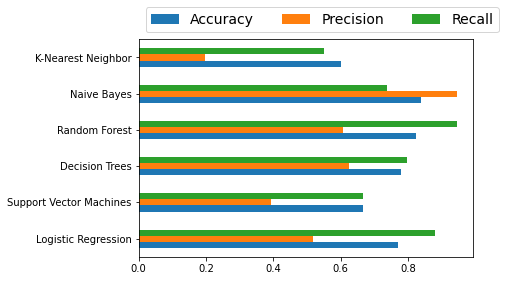

In [22]:
plt.figure(figsize=(16,16))
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.plot()

<br><br>
# **Feature Selection & Prediction with Naive Bayes**
<br><br>

In [25]:
%pip install mlxtend --upgrade
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [29]:
gaussian_nb = models['Naive Bayes']
sfs1 = sfs(gaussian_nb, k_features=17, forward=False, cv=5, verbose=1, scoring='r2')
sfs1 = sfs1.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished
Features: 40/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished
Features: 39/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.2s finished
Features: 38/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.4s finished
Features: 37/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.6s finished
Features: 36/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.6s finished
Features: 35/17[Par

In [30]:
sfs1.subsets_

{41: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40),
  'cv_scores': array([ 0.74637965, -0.09902153, -0.14129159,  0.33333333, -0.18888889]),
  'avg_score': 0.1301021961295933,
  'feature_names': ('Age (yrs)',
   'Weight (Kg)',
   'Height(Cm) ',
   'BMI',
   'Blood Group',
   'Pulse rate(bpm) ',
   'RR (breaths/min)',
   'Hb(g/dl)',
   'Cycle(R/I)',
   'Cycle length(days)',
   'Marraige Status (Yrs)',
   'Pregnant(Y/N)',
   'No. of aborptions',
   'I beta-HCG(mIU/mL)',
   'II beta-HCG(mIU/mL)',
   'FSH(mIU/mL)',
   'LH(mIU/mL)',
   'FSH/LH',
   'Hip(inch)',
   'Waist(inch)',
   'Waist:Hip Ratio',
   'TSH (mIU/L)',
   'AMH(ng/mL)',
   'PRL(ng/mL)',
   'Vit D3 (ng/mL)',
   'PRG(ng/mL)',
   'RBS(mg/dl)',
   'Weight gain(Y/N)',
   'hair growth(Y/N)',

In [31]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Pulse rate(bpm) ', 'Cycle(R/I)', 'Marraige Status (Yrs)', 'Hip(inch)', 'AMH(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'BP _Systolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)']


In [32]:
new_df = df[feat_names]
new_df['PCOS (Y/N)'] = df['PCOS (Y/N)']

new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pulse rate(bpm),Cycle(R/I),Marraige Status (Yrs),Hip(inch),AMH(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),BP _Systolic (mmHg),Follicle No. (L),Follicle No. (R),PCOS (Y/N)
0,78,2,7.0,36,2.07,17.1,0.57,92.0,0,0,0,0,0,1,110,3,3,0
1,74,2,11.0,38,1.53,61.3,0.97,92.0,0,0,0,0,0,0,120,3,5,0
2,72,2,10.0,40,6.63,49.7,0.36,84.0,0,0,0,1,1,1,120,13,15,1
3,72,2,4.0,42,1.22,33.4,0.36,76.0,0,0,0,0,0,0,120,2,2,0
4,72,2,1.0,37,2.26,43.8,0.38,84.0,0,0,0,1,0,0,120,3,4,0


In [33]:
new_df.shape, df.shape

((539, 18), (539, 43))

<br><br>
## **Prediction with selected features**
<br><br>

In [35]:
X = new_df.iloc[:, 0:-1]
Y = new_df.iloc[:, -1]
X

,Pulse rate(bpm),Cycle(R/I),Marraige Status (Yrs),Hip(inch),AMH(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),BP _Systolic (mmHg),Follicle No. (L),Follicle No. (R)
0,78,2,7.0,36,2.07,17.1,0.57,92.0,0,0,0,0,0,1,110,3,3
1,74,2,11.0,38,1.53,61.3,0.97,92.0,0,0,0,0,0,0,120,3,5
2,72,2,10.0,40,6.63,49.7,0.36,84.0,0,0,0,1,1,1,120,13,15
3,72,2,4.0,42,1.22,33.4,0.36,76.0,0,0,0,0,0,0,120,2,2
4,72,2,1.0,37,2.26,43.8,0.38,84.0,0,0,0,1,0,0,120,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,72,2,8.0,28,1.70,36.6,0.25,92.0,0,0,0,0,0,0,110,1,0
535,72,2,4.0,34,5.60,23.0,0.25,108.0,1,0,0,0,0,0,110,9,7
536,74,2,8.0,30,3.70,22.5,0.25,92.0,0,0,0,0,0,0,110,1,0
537,74,4,2.0,28,5.20,22.4,0.25,115.0,0,0,0,0,1,0,110,7,6


In [36]:
Y

0      0
1      0
2      1
3      0
4      0
      ..
534    0
535    0
536    0
537    0
538    1
Name: PCOS (Y/N), Length: 539, dtype: int64

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.25, random_state=0)

In [38]:
# Fit the classifier
gaussian_nb.fit(X_train, Y_train)

# Make predictions
predictions = gaussian_nb.predict(X_test)

# Calculate metrics
acc_nb = accuracy_score(predictions, Y_test)
prec_nb = precision_score(predictions, Y_test)
recall_nb = recall_score(predictions, Y_test)

In [40]:
from tabulate import tabulate
print(tabulate([['Accuracy', acc_nb], ['Precision', prec_nb], ['Recall', recall_nb]], headers=['Metrics    ', 'Value     ']))

Metrics          Value
-------------  ------------
Accuracy           0.851852
Precision          0.892857
Recall             0.78125


<br><br>
## **Confusion Matrix**
<br><br>


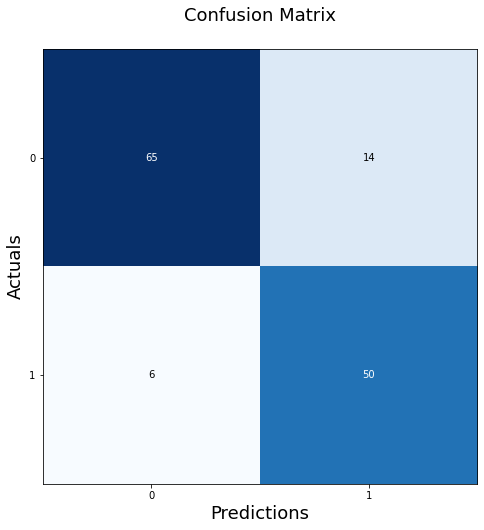

In [43]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# plot_confusion_matrix(gaussian_nb, X_test, Y_test)

conf_matrix = confusion_matrix(y_true=Y_test, y_pred=predictions)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(8, 8), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()